In [16]:
from tenzometer_calibration import readCalibration
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
from datetime import datetime

In [25]:
calib = readCalibration("calibration/Tenzo0-08-05-2023-17-49-02.csv")
ramps = calib[calib["Status"].isin(["up","down"])]
ramps = ramps.loc[ramps["V"] > 0.0001410]

rampsUp = calib[calib["Status"] == "up"]
rampsUp = rampsUp.loc[rampsUp["V"] > 0.0001410]

rampsDown = calib[calib["Status"] == "down"]
rampsDown = rampsDown.loc[rampsDown["V"] > 0.0001410]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [18]:


# def doFit():

slope, intercept, r_value, p_value, std_err  = linregress(ramps["F"],ramps["V"])
F_edges = [0,ramps["F"].max()+0.2]
calibLine = np.array([slope*F_edges[0] + intercept, slope*F_edges[1] + intercept])
print(len(ramps["F"]))
err = np.sqrt(np.sum(np.abs(slope*ramps["F"] + intercept - ramps["V"])**2)/(len(ramps["F"])-1))
calibBorders = np.array([[slope*F_edges[0] + intercept - err, slope*F_edges[1] + intercept - err],
                [slope*F_edges[0] + intercept + err, slope*F_edges[1] + intercept + err]
                ])


33


3.6934467382848064e-05

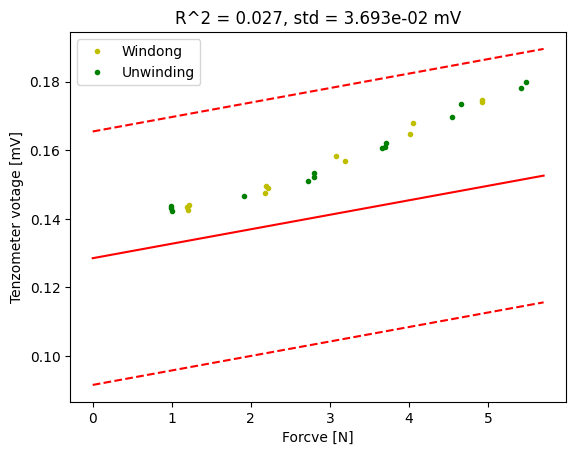

In [19]:


plt.plot(rampsDown["F"],rampsDown["V"]*10**3,".y")
plt.plot(rampsUp["F"],rampsUp["V"]*10**3,".g")
plt.legend(["Windong","Unwinding"])
plt.plot(F_edges, calibBorders[0]*10**3, "--r")
plt.plot(F_edges, calibBorders[1]*10**3, "--r")
plt.plot(F_edges, calibLine*10**3, "-r")

plt.xlabel("Forcve [N]")

plt.ylabel("Tenzometer votage [mV]")
plt.title("R^2 = %1.3f, std = %1.3e mV" %(r_value**2, err*10**3))

err

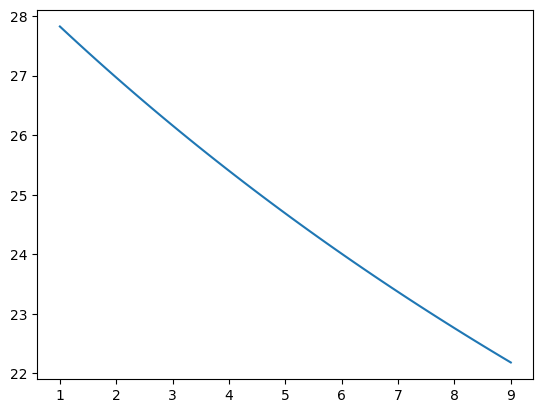

In [20]:
F = np.linspace(1,9)
rel_err = err/(slope*F + intercept)
plt.plot(F,rel_err*100)


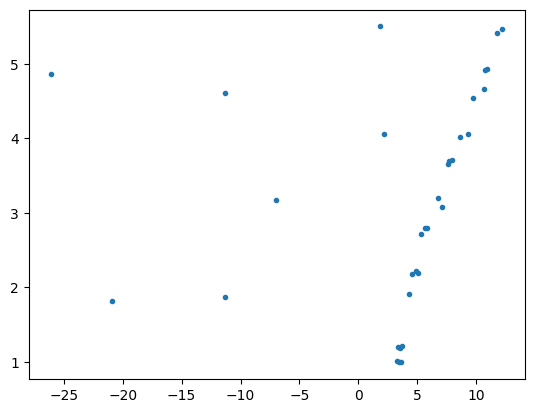

In [21]:
p = [- intercept/slope, 1/slope]
F = ramps["V"]*p[1] + p[0]

plt.plot(F, ramps["F"], ".")

8.751356880257102

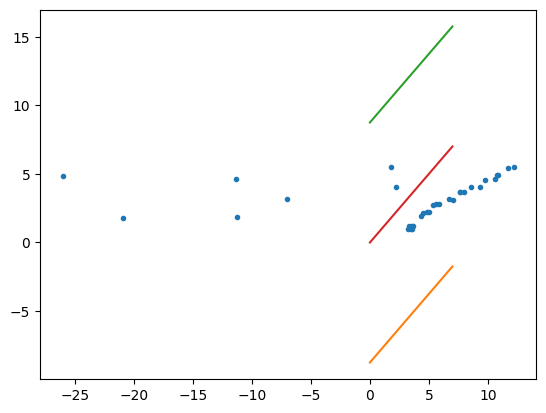

In [22]:
err = np.sqrt(np.sum(np.abs(F - ramps["F"])**2)/(len(F)-1))

errLine = [[ -err, 7 - err],
                [ err, 7 + err]
                ]

plt.plot(F, ramps["F"], ".")
plt.plot([0,7],errLine[0])
plt.plot([0,7],errLine[1])
plt.plot([0,7], [0,7])
err


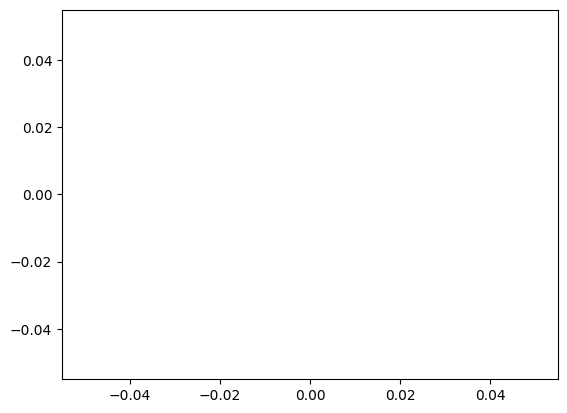

In [23]:
# F and V are swapped for dynamic samples!!!
dynamic = calib[calib["Status"].isin(["bot2top"])]
plt.plot(dynamic["T1"], (dynamic["V"]))

# plt.plot(dynamic["T1"], -(p[1]*dynamic["F"] + p[0]))

# plt.xlim([0,5])



In [24]:
Fsettling = np.array(dynamic["V"])
Tsettling = np.array(dynamic["T1"])

i_start = int(np.argmax(Fsettling))
print(Tsettling[i_start])



Fsettling = np.array(Fsettling[i_start:])
Tsettling = np.array(Tsettling[i_start:]) - Tsettling[i_start]
plt.plot(Tsettling, Fsettling)

ValueError: attempt to get argmax of an empty sequence

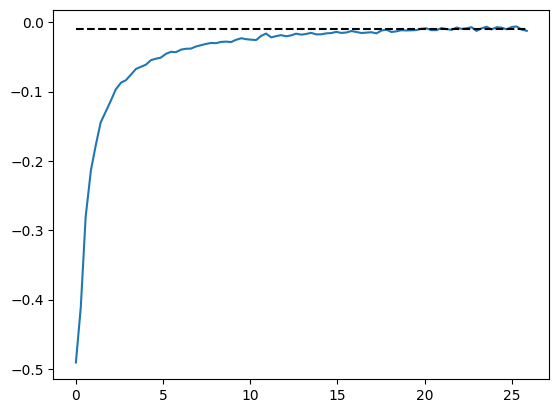

In [ ]:
dFsettling = np.gradient(Fsettling, Tsettling)
plt.plot(Tsettling, dFsettling)
plt.plot([0,Tsettling[-1]], [-0.01, -0.01], "--k")